## Averaging

### General

Values of c are uniformly distributed. So, mostly, patches wih higher values of c stand near patches with lower values. During averaging, darker patches give bigger shares to their neigbours. Simultaniously, their lighter neighbours give smaller shares. Most of patches obtain mean values.  
Due to randomness, some patches were in neighbourhood of same shade. They preserve their shade.  
Get normal distribution.

Let's continue.  
Dark regions, surrounding smaller white, occupy them. The same for white regions. Obtain 2 big neighborhoods: white and black with mean patches as a bound.  
If area of neighborhood is smaller than area of bound between white and black regions, we have distribution like normal. Otherwise, distribution with 2 big bars on sides.

### Variant

Distribution looks the same. But now shade of patches is moving in the left top angle.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [27]:
df = pd.read_csv('aver.csv', skiprows=6).drop(columns=['[step]'])
df = df.rename(columns={'[run number]': 'run_num', '[c] of patches': 'c_values'})
df.c_values = df.c_values.apply(lambda x: [round(float(num), 3) for num in x.strip('[]').split()])
df.columns

Index(['run_num', 'w', 'c_values'], dtype='object')

In [16]:
# 1 row - array of values
# or multiple rows for 1 run

# import ast
# list_df = pd.DataFrame(data={'l': ['[1, 2, 3]', '[4, 5, 6]']})
# list_df.l = list_df.l.apply(ast.literal_eval)
# list_df
# list_df.l

# pd.DataFrame(list_df.l.tolist(), dtype=np.int16)

0    [1, 2, 3]
1    [4, 5, 6]
Name: l, dtype: object

In [23]:
# pd.DataFrame({'run': [1 for _ in range(3)], 'w': [2 for _ in range(3)], 'c_values': [1, 2, 3]})

,run,w,c_values
0,1,2,1
1,1,2,2
2,1,2,3


In [ ]:
list_version_df = df

In [39]:
df = list_version_df

patches_num = len(df['c_values'].iloc[0])
for _, row in list_version_df.iterrows():
    run_df = pd.DataFrame({'run_num': [row['run_num'] for _ in range(patches_num)],
                          'w': [row['w'] for _ in range(patches_num)],
                          'c_values': row['c_values']})
    df = pd.concat([df, run_df], axis=0)
    
df = df.iloc[list_version_df.shape[0]:, :]
df = df.reset_index(drop=True)

In [44]:
print(df.shape)
print(df.head())

(31212, 3)
   run_num     w c_values
0        5  0.35    0.489
1        5  0.35    0.457
2        5  0.35    0.407
3        5  0.35    0.391
4        5  0.35    0.783


In [70]:
list_version_df.set_index(['run_num', 'w']).sort_index()['c_values'].apply(lambda x: (np.std(x), np.mean(x)))

run_num  w   
1        0.10    (0.24998268361144182, 0.40286966551326414)
2        0.10        (0.25423543160161, 0.4654071510957324)
3        0.10      (0.2662172865258335, 0.6405444059976932)
4        0.35     (0.26007970749665194, 0.6003733179546328)
5        0.35      (0.25180475116841367, 0.501291041906959)
6        0.35     (0.24917596310813747, 0.4994079200307574)
7        0.60     (0.25103833606367176, 0.5002399077277969)
8        0.60     (0.26558216636645365, 0.5006036139946174)
9        0.60     (0.27424569838510093, 0.5003487120338331)
10       0.85        (0.30794905508958, 0.4993529411764706)
11       0.85      (0.2521047268843825, 0.4998512110726644)
12       0.85     (0.25340822626752013, 0.5000665128796616)
Name: c_values, dtype: object

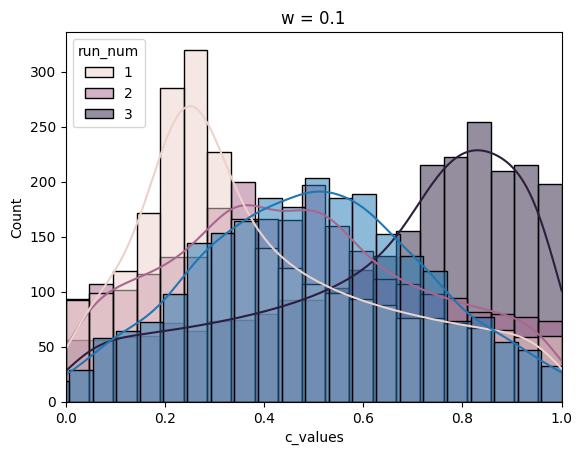

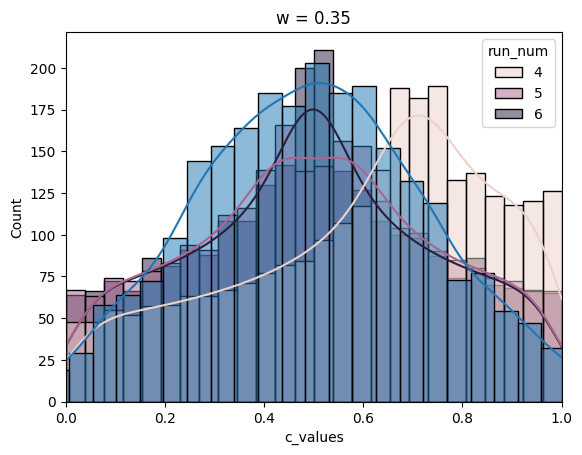

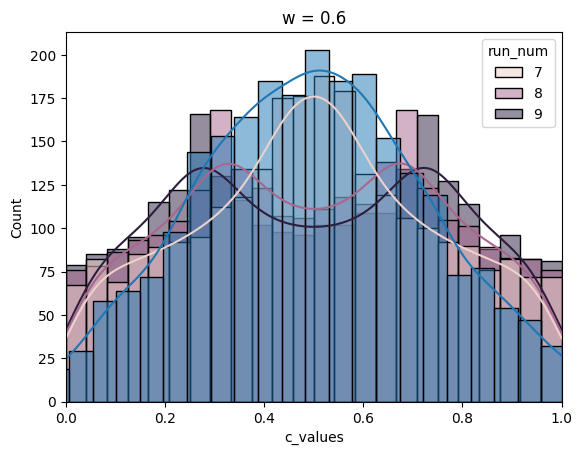

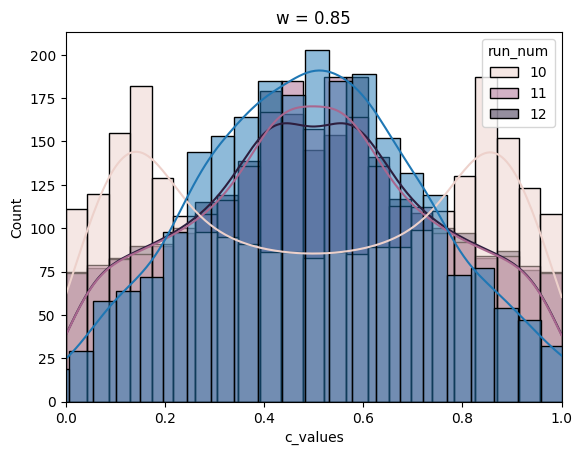

In [72]:
np.random.seed(0)
x = np.random.normal(loc=0.5, scale=0.25, size=2500)

for w in sorted(df['w'].unique()):
    fig, ax = plt.subplots()
    sns.histplot(data=df[df['w'] == w], ax=ax, x='c_values', hue='run_num', kde=True).set(title=f'w = {w}')
    sns.histplot(data=x, ax=ax, kde=True)
    ax.set_xlim([0, 1])
    plt.show()

w = 0.1:  
Normal distribution shifted from mean = 0.5.

w = 0.35, 0.6, 0.85:  
Distribution like normal with mean = 0.5 and std = 0.25. Or like 2 shifted normals.

Conclusions:
1. Distributions of c levels are like normal.
2. Smaller w - greater chance for shifted distribution.

![Averaging without rescaling](img/aver_no_rescaling.png)

Stable distribution for averaging without rescaling.

Conclusions:
1. Without rescaling all patches become grey.  
We have uniform distribution from the beginning. During diffusion patches tend to get the same value. If we rescale values, we make some patches rest white and black. Withour rescaling, patches gradually get one color.

## Averaging with noise

In [25]:
df = pd.read_csv('aver_noise.csv', skiprows=6).drop(columns=['w'])
df = df.rename(columns={'[run number]': 'run_num', 'count patches with [pcolor = black]': 'num_black', '[step]': 'step'})
df.columns

Index(['run_num', 'noise', 'threshold', 'step', 'num_black'], dtype='object')

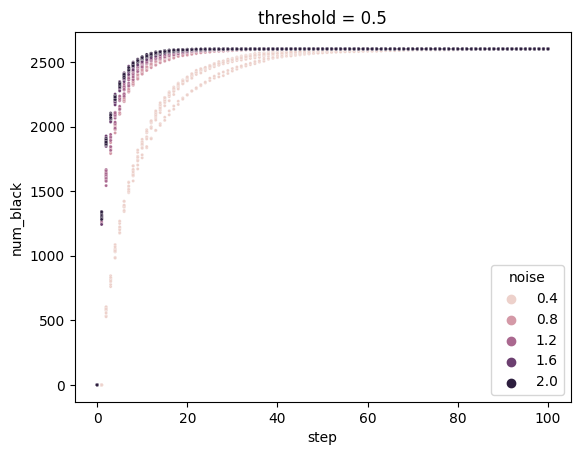

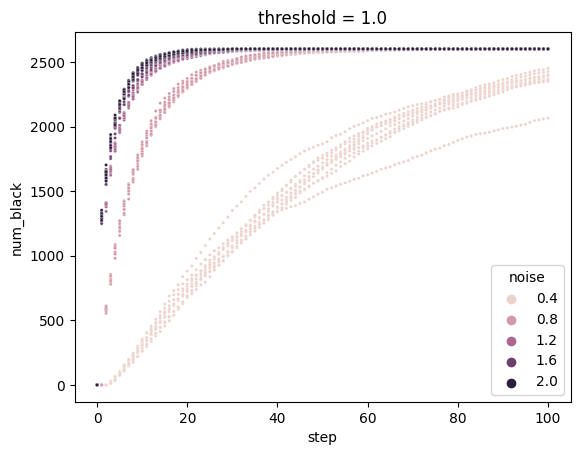

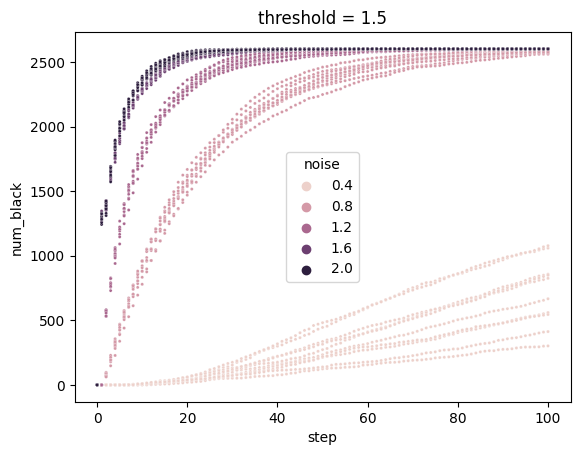

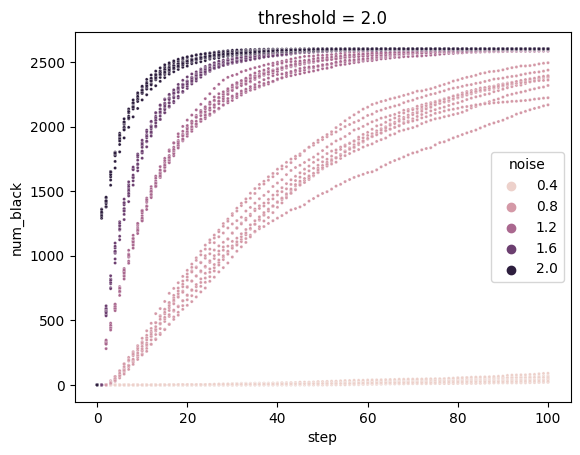

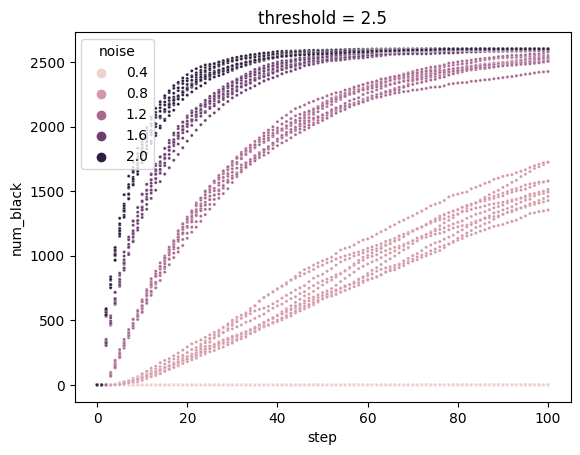

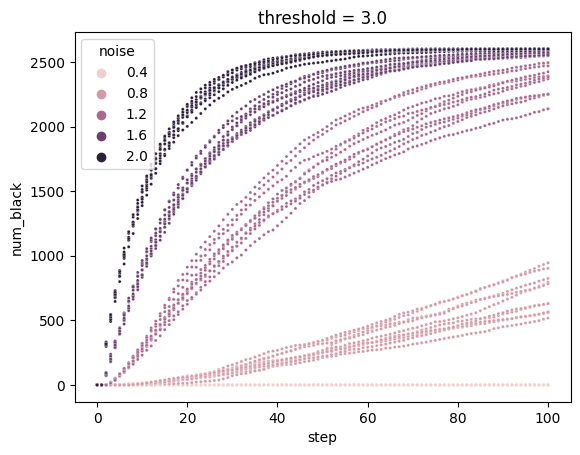

In [26]:
for threshold in sorted(df['threshold'].unique()):
    sns.scatterplot(data=df[df['threshold'] == threshold], x='step', y='num_black', hue='noise', s=5).set(title=f'threshold = {threshold}')
    plt.show()

(101, 6)


,run_num,w,noise,threshold,step,num_black
0,1,0.5,1.2,3,0,0
1,1,0.5,1.2,3,1,0
2,1,0.5,1.2,3,2,0
3,1,0.5,1.2,3,3,21
4,1,0.5,1.2,3,4,51


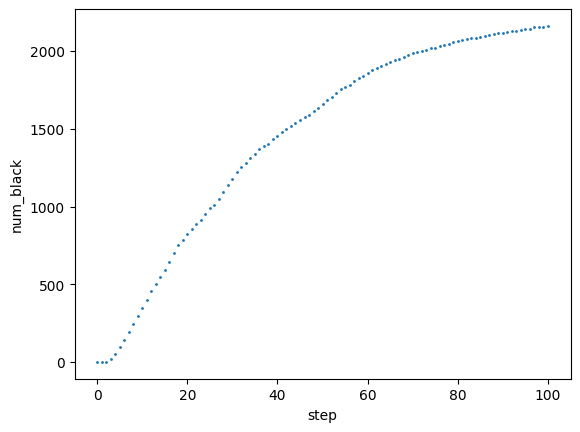

In [24]:
# for test

# threshold = 3
# noise = 1.2

# cur_df = df[(df['threshold'] == threshold) & (df['noise'] == noise)]

# print(cur_df.shape)
# display(cur_df.head())

# sns.scatterplot(data=cur_df, x='step', y='num_black', s=5)
# plt.show()

Conclusions:
1. Greater value of threshold - higher probability that patch's c will overcome it.
2. Higher noise - higher probability that patch's c will jump up to threshold in first ticks.

## General framework

In [6]:
df = pd.read_csv('general.csv', skiprows=6).drop(columns=[])
df = df.rename(columns={'[run number]': 'run_num', 'count patches with [pcolor = black] / N': 'alive_pop', '[step]': 'step', 'initial-pop': 'init_pop'})
df.columns

Index(['run_num', 'init_pop', 'delta', 'step', 'alive_pop'], dtype='object')

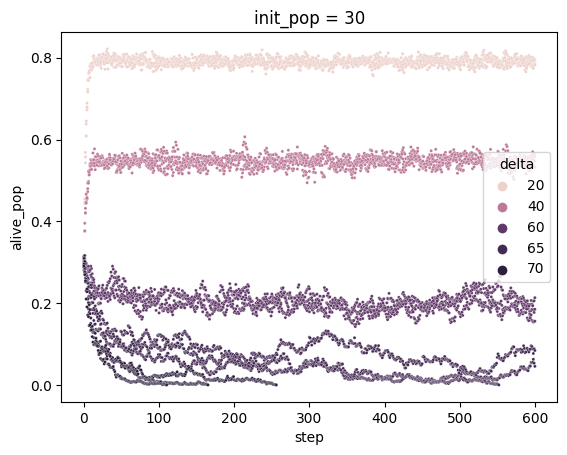

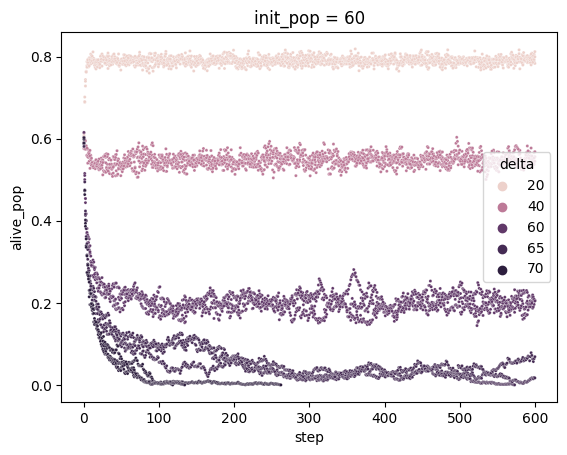

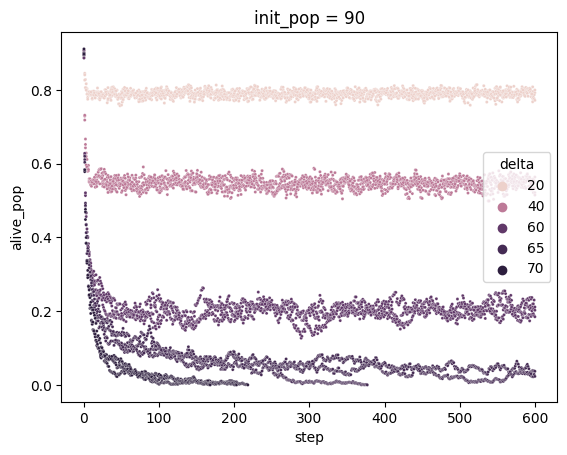

In [7]:
for init_pop in sorted(df['init_pop'].unique()):
    sns.scatterplot(data=df[df['init_pop'] == init_pop], x='step', y='alive_pop', hue='delta', s=5).set(title=f'init_pop = {init_pop}')
    plt.show()

Let's firstly analyze different population proportion, depending on delta values (max = 100).

- delta = 20, 40, 60  
Alive population proportion decrease or increase up to particular level. After that it stays stable.

- delta = 65  
Critical value of delta. Population may live for long, but eventually will die.

- delta = 70  
After critical value population dies before 300 tick. For any initial proportion of alive cells.

Now move to parameter of initial alive cells proportion.

It affects only initial rate. Then rates come to the same level for particular delta.

Conclusions:
1. Parameter of initial alive cells proportion affects only initial proportion.
2. The stable proportion of live cells depends on delta.
3. Critical delta = 65.

## Conclusions

Wrote out summary for every part.

Averaging:
1. Distributions of c levels are like normal.
2. Smaller w - greater chance for shifted distribution.

Averaging with noise:
1. Greater value of threshold - higher probability that patch's c will overcome it.
2. Higher noise - higher probability that patch's c will jump up to threshold in first ticks.

General framework:
1. Parameter of initial alive cells proportion affects only initial proportion.
2. The stable proportion of live cells depends on delta.
3. Critical delta = 65.